In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv("RecommendationDataSetFinal1.csv")
df.columns

Index(['Seed_ID', 'Plant_Category', 'Seed_Name', 'Soil_Types',
       'Best_Growing_Areas', 'Season', 'Temperature', 'Soil_Temperature',
       'Precipitation', 'Precip', 'Soil_Moisture', 'Sunshine_Duration',
       'Humid'],
      dtype='object')

In [3]:
X=df[['Temperature','Soil_Moisture','Soil_Temperature',"Precipitation","Humid"]]
y = df[["Seed_Name"]]


In [4]:
X

,Temperature,Soil_Moisture,Soil_Temperature,Precipitation,Humid
0,22.5,0.25,18.0,3.5,70.0
1,18.0,0.30,15.0,10.0,60.0
2,22.0,0.30,18.0,5.0,60.0
3,22.0,0.30,18.0,5.0,60.0
4,18.0,0.30,22.0,5.0,70.0
...,...,...,...,...,...
8124,22.5,0.25,18.3,5.7,60.0
8125,20.0,0.30,15.0,5.0,50.0
8126,22.5,0.25,20.0,5.0,65.0
8127,20.0,0.30,18.0,5.0,60.0


In [5]:
distances = []
for i in range(len(X["Soil_Moisture"])):
    distance = np.sqrt(((0-X.iloc[i,0]))**2+(0-X.iloc[i,1])**2)
    distances.append(distance)
# distances
X['distances']   = distances
X


C:\Users\PMLS\AppData\Local\Temp\ipykernel_11952\1298276140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['distances']   = distances


,Temperature,Soil_Moisture,Soil_Temperature,Precipitation,Humid,distances
0,22.5,0.25,18.0,3.5,70.0,22.501389
1,18.0,0.30,15.0,10.0,60.0,18.002500
2,22.0,0.30,18.0,5.0,60.0,22.002045
3,22.0,0.30,18.0,5.0,60.0,22.002045
4,18.0,0.30,22.0,5.0,70.0,18.002500
...,...,...,...,...,...,...
8124,22.5,0.25,18.3,5.7,60.0,22.501389
8125,20.0,0.30,15.0,5.0,50.0,20.002250
8126,22.5,0.25,20.0,5.0,65.0,22.501389
8127,20.0,0.30,18.0,5.0,60.0,20.002250


In [6]:
X= X.sort_values(by='distances')
X

,Temperature,Soil_Moisture,Soil_Temperature,Precipitation,Humid,distances
7542,-2.0,0.200,4.0,5.0,70.0,2.009975
6642,-2.0,0.300,5.0,3.0,60.0,2.022375
3122,4.5,0.350,6.2,2.5,70.0,4.513591
4007,-5.0,0.200,8.0,5.0,60.0,5.003998
5480,5.0,0.225,17.5,0.5,45.0,5.005060
...,...,...,...,...,...,...
6450,30.0,0.400,27.5,5.0,70.0,30.002667
3606,30.0,0.400,27.5,5.0,60.0,30.002667
3823,30.0,0.400,27.5,5.0,60.0,30.002667
6259,30.0,0.400,22.5,5.0,60.0,30.002667


In [7]:
previous = 0
for i in range(len(X['Soil_Moisture'])-1):
    distance = np.sqrt(((X.iloc[i,0]-X.iloc[i+1,0]))**2+(X.iloc[i,1]-X.iloc[i+1,1])**2)
    previous+=distance
previous


307.2834384055227

In [8]:
avg_dis = previous/len(X['Soil_Moisture'])
print(avg_dis)

0.03780089044230812


In [9]:
clusters = None
for i in range(len(X['Soil_Moisture'])-1):
    distance = np.sqrt(((X.iloc[i,0]-X.iloc[i+1,0]))**2+(X.iloc[i,1]-X.iloc[i+1,1])**2)
    if clusters is None:
        clusters =[]
        clusters.append(1)
    else:
        if distance<avg_dis:
            last=clusters[-1]
            clusters.append(last)
        else:
            last = clusters[-1]
            clusters.append(last+1)


clusters.append(clusters[-1])
clusters


[1,
 2,
 3,
 4,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 28,
 28,
 29,
 29,
 30,
 30,
 31,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 34,
 34,
 34,
 35,
 36,
 37,
 38,
 39,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 42,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 46,
 46,
 46,
 4

In [10]:
# print(len(np.array(clusters).unique))
print(len(np.unique(clusters)))
X["clusters"] = clusters
X

213


,Temperature,Soil_Moisture,Soil_Temperature,Precipitation,Humid,distances,clusters
7542,-2.0,0.200,4.0,5.0,70.0,2.009975,1
6642,-2.0,0.300,5.0,3.0,60.0,2.022375,2
3122,4.5,0.350,6.2,2.5,70.0,4.513591,3
4007,-5.0,0.200,8.0,5.0,60.0,5.003998,4
5480,5.0,0.225,17.5,0.5,45.0,5.005060,5
...,...,...,...,...,...,...,...
6450,30.0,0.400,27.5,5.0,70.0,30.002667,212
3606,30.0,0.400,27.5,5.0,60.0,30.002667,212
3823,30.0,0.400,27.5,5.0,60.0,30.002667,212
6259,30.0,0.400,22.5,5.0,60.0,30.002667,213


In [11]:
print(len(np.unique(clusters)))

213


In [12]:
X.head()

,Temperature,Soil_Moisture,Soil_Temperature,Precipitation,Humid,distances,clusters
7542,-2.0,0.200,4.0,5.0,70.0,2.009975,1
6642,-2.0,0.300,5.0,3.0,60.0,2.022375,2
3122,4.5,0.350,6.2,2.5,70.0,4.513591,3
4007,-5.0,0.200,8.0,5.0,60.0,5.003998,4
5480,5.0,0.225,17.5,0.5,45.0,5.005060,5


C:\Users\PMLS\AppData\Local\Temp\ipykernel_11952\50306893.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


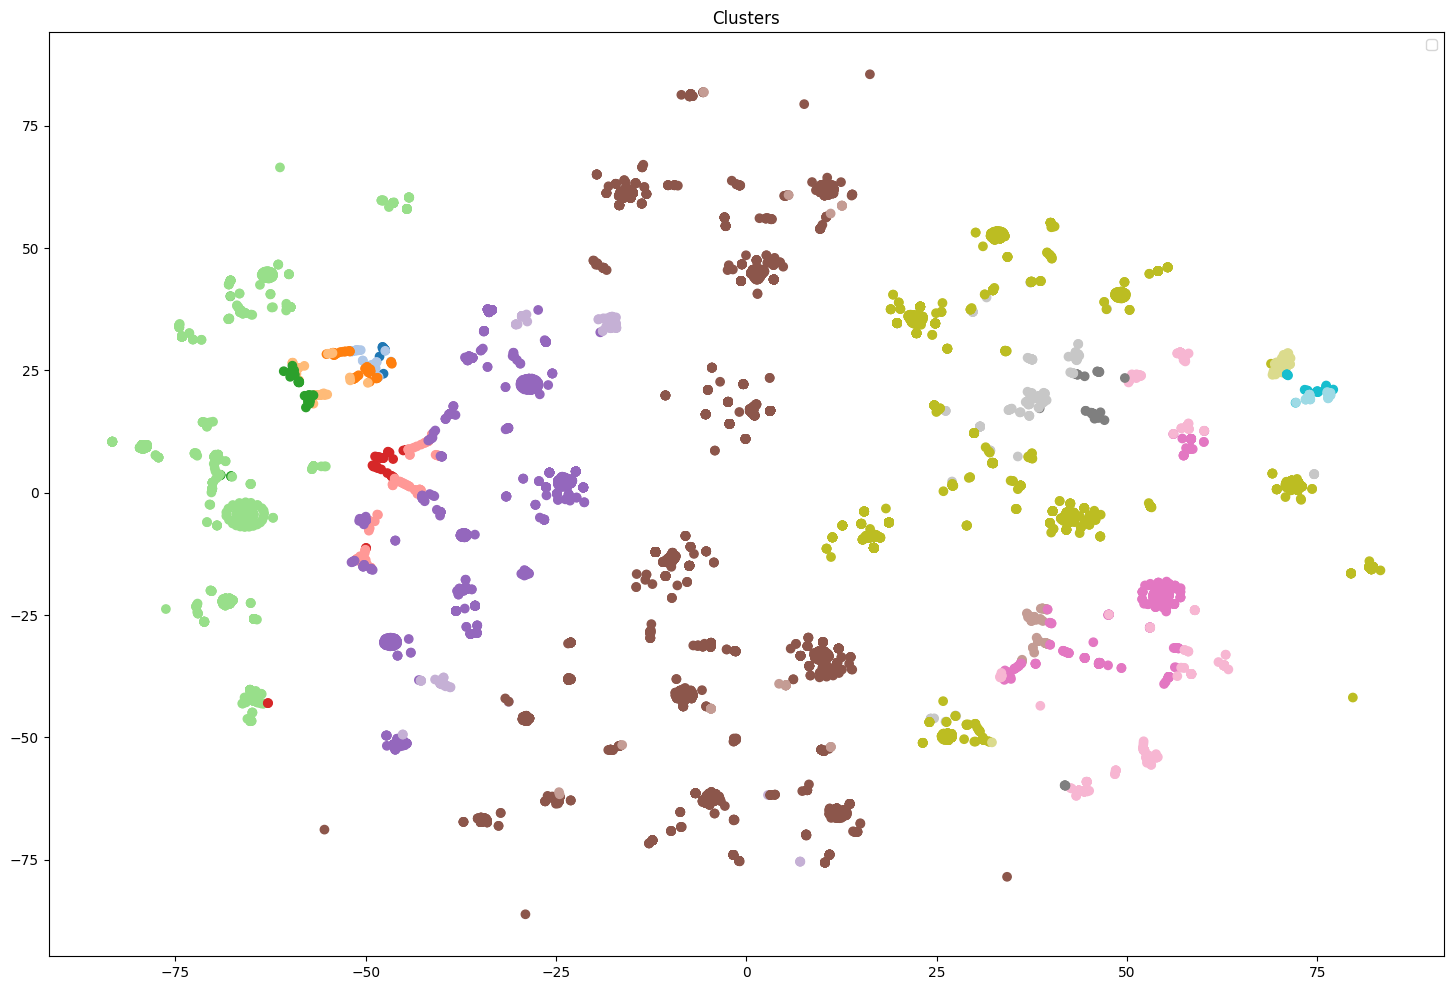

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(18,12))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=clusters,cmap='tab20')
plt.legend()
plt.title("Clusters")
plt.show()

In [31]:
import numpy as np

# Initialize a new column 'centroids' with NaN values
X['centroids'] = 1
X

# Get the unique clusters from the DataFrame
unique_clusters = X["clusters"].unique()
print(unique_clusters)

for i in unique_clusters:  # Iterate over actual cluster values
    # Filter data for the current cluster
    cluster_data = X[X["clusters"] == i+1]
    
    if len(cluster_data) > 0:  # Ensure the cluster has data
        # Select the first point as the centroid
        centroid = cluster_data.iloc[0][['Temperature','Soil_Moisture','Soil_Temperature',"Precipitation","Humid"]].values
        print("centroid : ",centroid)
        print(cluster_data)
        
        # Calculate the Euclidean distance of each point in the cluster from the centroid
        distances = np.sqrt((cluster_data["Temperature"] - centroid[0])**2+(cluster_data["Soil_Moisture"] - centroid[1])**2+(cluster_data["Soil_Temperature"] - centroid[2])**2+(cluster_data["Precipitation"] - centroid[3])**2+(cluster_data["Humid"] - centroid[4])**2)
        mean_distance = distances.mean()
        
        # Assign the mean distance to the 'centroids' column for all rows in the cluster
        X.loc[X["clusters"] == i, 'centroids'] = mean_distance

# Check the updated DataFrame
print(X.head())


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213]
centroid :  [-2.   0.3  5.   3.  60. ]
      Temperature  Soil_Moisture  Soil_Temperature  Precipitation  Humid  \
6642         -2.0   

C:\Users\PMLS\AppData\Local\Temp\ipykernel_11952\3039061691.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.032115487335131' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[X["clusters"] == i, 'centroids'] = mean_distance


centroid :  [-10.    0.3  10.    5.   50. ]
      Temperature  Soil_Moisture  Soil_Temperature  Precipitation  Humid  \
3854        -10.0            0.3              10.0            5.0   50.0   
2272         10.0            0.3               8.0            5.0   70.0   
1133         10.0            0.3              15.0            5.0   60.0   
5156         10.0            0.3              15.0            5.0   60.0   
3423         10.0            0.3              12.0            5.0   60.0   
7262         10.0            0.3               8.0            5.0   60.0   
371          10.0            0.3              12.0            5.0   60.0   
7619         10.0            0.3               8.0            3.0   70.0   
3395         10.0            0.3              15.0            5.0   50.0   

      distances  clusters  centroids  
3854  10.004499        26        1.0  
2272  10.004499        26        1.0  
1133  10.004499        26        1.0  
5156  10.004499        26        1.0  


In [27]:
X[X["clusters"]==5]

,Temperature,Soil_Moisture,Soil_Temperature,Precipitation,Humid,distances,clusters,centroids
5480,5.0,0.225,17.5,0.5,45.0,5.00506,5,10.032115


salute score +percentage +average distance =change average distance
use salute score or elbow method 

In [29]:
X[X["clusters"]==1]

,Temperature,Soil_Moisture,Soil_Temperature,Precipitation,Humid,distances,clusters,centroids
7542,-2.0,0.2,4.0,5.0,70.0,2.009975,1,0.0
